In [1]:
import numpy as np
import pandas as pd

In [2]:
demomat = pd.read_csv("Demomatrix.xls", delimiter='\t')
demomat.head(20)

,Geneid,RI-BR1-21,RI-BR2-21,SI-BR1-21,SI-BR2-21
0,gene:Minc3s09726g43483,0.0000,0.0,0.0,0.0000
1,gene:Minc3s09726g43484,0.0000,0.0,0.0,0.0000
2,gene:Minc3s09726g43485,0.0000,0.0,0.0,0.0000
3,gene:Minc3s00760g16979,0.0000,0.0,0.0,0.0000
4,gene:Minc3s00760g16980,0.0000,0.0,0.0,0.0000
5,gene:Minc3s00760g16981,0.0000,0.0,0.0,0.0000
6,gene:Minc3s00760g16982,2.2234,0.0,3.0,2.0000
7,gene:Minc3s00760g16983,0.0000,0.0,1.0,22.2342
8,gene:Minc3s00760g16984,0.0000,0.0,0.0,0.0000
9,gene:Minc3s06092g39313,0.0000,0.0,0.0,0.0000


In [3]:
print(demomat.shape)
print(demomat.info())

(9999, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Geneid     9999 non-null   object 
 1   RI-BR1-21  9999 non-null   float64
 2   RI-BR2-21  9999 non-null   float64
 3   SI-BR1-21  9999 non-null   float64
 4   SI-BR2-21  9999 non-null   float64
dtypes: float64(4), object(1)
memory usage: 390.7+ KB
None


In [4]:
## Q1: NORMALIZATION(min_max normalization)

In [5]:
def  min_max(df):
    for i in df.columns[1:]:
        x= df[i]
        df[i] = ((x - x.min())/(x.max() - x.min()))

In [6]:
min_max(demomat)

In [7]:
demomat.head(15)

,Geneid,RI-BR1-21,RI-BR2-21,SI-BR1-21,SI-BR2-21
0,gene:Minc3s09726g43483,0.000000,0.0,0.000000,0.000000
1,gene:Minc3s09726g43484,0.000000,0.0,0.000000,0.000000
2,gene:Minc3s09726g43485,0.000000,0.0,0.000000,0.000000
3,gene:Minc3s00760g16979,0.000000,0.0,0.000000,0.000000
4,gene:Minc3s00760g16980,0.000000,0.0,0.000000,0.000000
5,gene:Minc3s00760g16981,0.000000,0.0,0.000000,0.000000
6,gene:Minc3s00760g16982,0.138962,0.0,0.040000,0.003774
7,gene:Minc3s00760g16983,0.000000,0.0,0.013333,0.041951
8,gene:Minc3s00760g16984,0.000000,0.0,0.000000,0.000000
9,gene:Minc3s06092g39313,0.000000,0.0,0.000000,0.000000


In [8]:
demomat.to_csv("normalised.csv")

In [9]:
## Q1:PCA CALCULATION

In [10]:
df = demomat[['RI-BR1-21','RI-BR2-21','SI-BR1-21','SI-BR2-21']]
df = df.to_numpy()
df[:20]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1389625 , 0.        , 0.04      , 0.00377358],
       [0.        , 0.        , 0.01333333, 0.04195132],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00943396],
       [0.        , 0.07142857, 0.04      , 0.0245283 ],
       [0.        , 0.02380952, 0.        , 0.        ],
       [0.        , 0.        ,

In [11]:
# compute covarience matrix
features = df.T
co_matrix = np.cov(features)
co_matrix[:20]

array([[0.00055496, 0.00028846, 0.00024808, 0.00018928],
       [0.00028846, 0.0011747 , 0.00035295, 0.00032456],
       [0.00024808, 0.00035295, 0.00059116, 0.00038875],
       [0.00018928, 0.00032456, 0.00038875, 0.00047558]])

In [12]:
#compute eiganvalue and eiganvectors

values, vectors = np.linalg.eig(co_matrix)
vectors[:20]

array([[ 0.34462773,  0.32087823,  0.87911712,  0.07363408],
       [ 0.72932979, -0.68263582, -0.0342113 , -0.03026521],
       [ 0.44560432,  0.52081929, -0.30958202, -0.65904707],
       [ 0.38826097,  0.39974087, -0.3607515 ,  0.74787633]])

In [13]:
# Individual Principal Components

pca1 = df.dot(vectors.T[0])

In [14]:
print(vectors.T[1])

[ 0.32087823 -0.68263582  0.52081929  0.39974087]


In [15]:
# Checkng for variation captured by each of the principal components
# values are eigenvalues
explained_varience = []
for i in range(len(values)):
    explained_varience.append(values[i]/ np.sum(values))
print("varience for all eiganvectors: ", np.sum(explained_varience))

for i in range(len(values)):
    print("total  varience by PCA"+str(i+1)+":", explained_varience[i])

varience for all eiganvectors:  1.0
total  varience by PCA1: 0.6077195371893971
total  varience by PCA2: 0.2073246308368439
total  varience by PCA3: 0.13542527802664642
total  varience by PCA4: 0.049530553947112615


In [16]:
project_1 = df.dot(vectors.T[0])
project_2 = df.dot(vectors.T[1])
project_3 = df.dot(vectors.T[3])   ### only 2 component is taken as we can 
y = demomat['Geneid']              ### the explained varience for PCA4 is low
res = pd.DataFrame(project_1, columns=['PCA1'])
res['PCA2'] = project_2
res['PCA3'] = project_3
res['geneid'] = y
res.head(20)

,PCA1,PCA2,PCA3,geneid
0,0.000000,0.000000,0.000000,gene:Minc3s09726g43483
1,0.000000,0.000000,0.000000,gene:Minc3s09726g43484
2,0.000000,0.000000,0.000000,gene:Minc3s09726g43485
3,0.000000,0.000000,0.000000,gene:Minc3s00760g16979
4,0.000000,0.000000,0.000000,gene:Minc3s00760g16980
5,0.000000,0.000000,0.000000,gene:Minc3s00760g16981
6,0.067180,0.066931,-0.013307,gene:Minc3s00760g16982
7,0.022229,0.023714,0.022587,gene:Minc3s00760g16983
8,0.000000,0.000000,0.000000,gene:Minc3s00760g16984
9,0.000000,0.000000,0.000000,gene:Minc3s06092g39313


In [17]:
res.to_csv("pca.csv")

In [18]:
## plotting pca

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

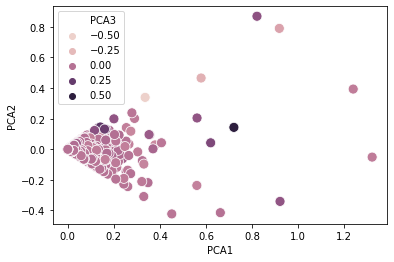

In [20]:
sns.scatterplot(res['PCA1'], res['PCA2'],hue=res['PCA3'], s=100);

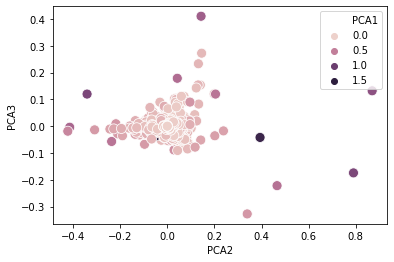

In [21]:
sns.scatterplot(res['PCA2'], res['PCA3'],hue=res['PCA1'], s=100);

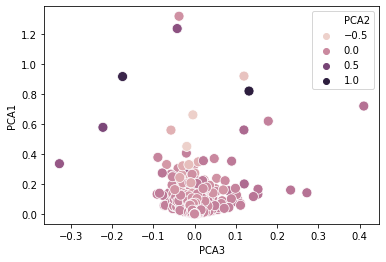

In [22]:
sns.scatterplot(res['PCA3'], res['PCA1'],hue=res['PCA2'], s=100);